In [30]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import jaccard_score

In [31]:
filename = '/Users/cristianjimenez/Downloads/archive/multimodal_imdb.hdf5'

with h5py.File(filename, 'r') as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['features', 'genres', 'images', 'imdb_ids', 'sequences', 'three_grams', 'vgg_features', 'word_grams']>


In [37]:
with h5py.File(filename, 'r') as f:
    images = f['images']
    total_images = len(images)
    print('Total de imágenes:', total_images)

Total de imágenes: 25959


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..138].


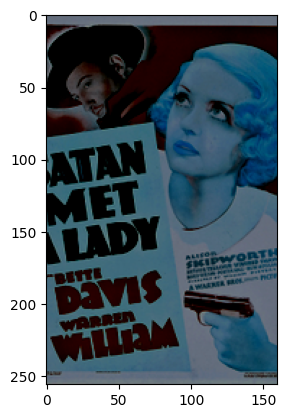

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


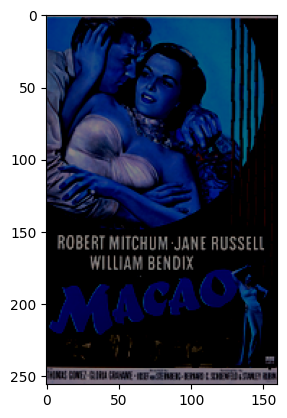

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..141].


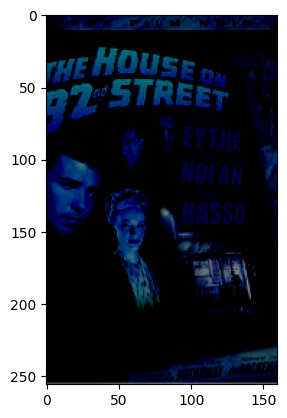

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


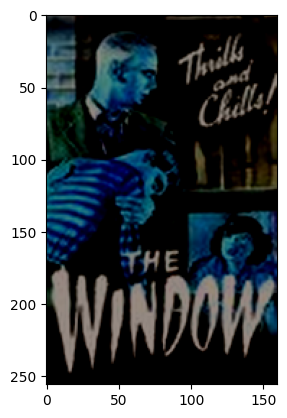

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


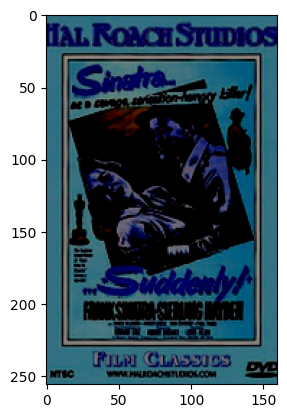

In [32]:
with h5py.File(filename, 'r') as f:
    # Get the images data
    images = f['images']

    # Loop over the images
    for i in range(len(images)):
        # Get the image
        image = images[i]

        # Transpose the image data to (height, width, channels)
        image = np.transpose(image, (1, 2, 0))

        # Display the image using matplotlib
        plt.imshow(image)
        plt.show()

        # Break after displaying the first 5 images
        if i == 4:
            break

In [33]:
genres_list = [
    'Drama',
    'Comedy',
    'Romance',
    'Thriller',
    'Crime',
    'Action',
    'Adventure',
    'Horror',
    'Documentary',
    'Mystery',
    'Sci-Fi',
    'Fantasy',
    'Family',
    'Biography',
    'War',
    'History',
    'Music',
    'Animation',
    'Musical',
    'Western',
    'Sport',
    'Short',
    'Film-Noir',
]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..138].


Géneros de la película: ['Drama', 'Thriller', 'Mystery', 'Film-Noir']


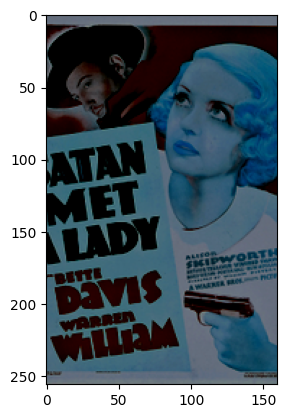

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Drama', 'Crime', 'Adventure', 'Film-Noir']


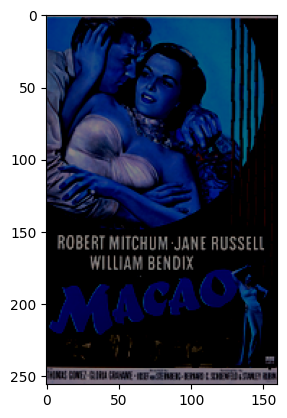

Géneros de la película: ['Drama', 'Thriller', 'Crime', 'Mystery', 'Film-Noir']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..141].


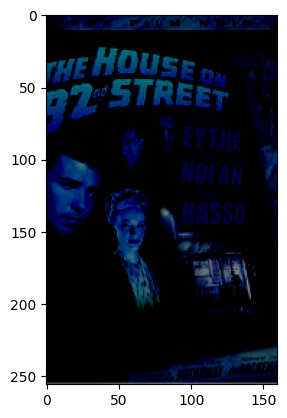

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Drama', 'Thriller', 'Film-Noir']


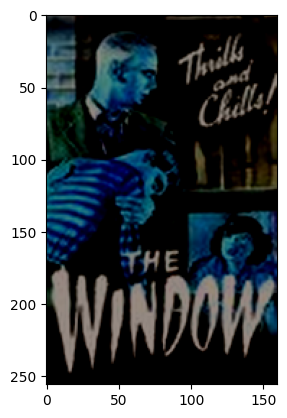

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Drama', 'Thriller', 'Crime', 'Film-Noir']


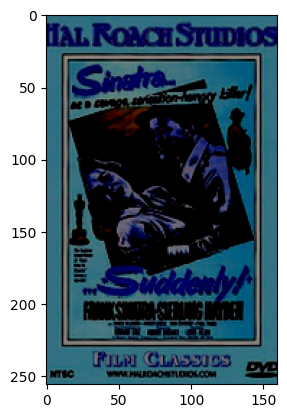

In [35]:
with h5py.File(filename, 'r') as f:
    # Obtiene los datos de las imágenes y los géneros
    images = f['images']
    genres = f['genres']

    # Recorre las primeras 5 imágenes y géneros
    for i in range(5):
        # Obtiene la imagen y el género
        image = images[i]
        genre = genres[i]

        # Transpone los datos de la imagen a (altura, ancho, canales)
        image = np.transpose(image, (1, 2, 0))

        # Convierte genre a una lista de booleanos
        genre_bool = [bool(g) for g in genre]

        # Usa la lista de booleanos para seleccionar los géneros correspondientes de genres_list
        movie_genres = [g for g, b in zip(genres_list, genre_bool) if b]

        # Imprime los géneros de la película
        print('Géneros de la película:', movie_genres)

        # Muestra la imagen usando matplotlib
        plt.imshow(image)
        plt.show()

In [41]:
from sklearn.model_selection import train_test_split

# Define el tamaño de los conjuntos de prueba y validación
test_size = 0.2
val_size = 0.25

# Carga las imágenes y los géneros
with h5py.File(filename, 'r') as f:
    images = f['images'][:5000]
    genres = f['genres'][:5000]

# Divide los datos en conjuntos de entrenamiento y prueba
train_images, test_images, train_genres, test_genres = train_test_split(images, genres, test_size=test_size, random_state=42)

# Divide los datos de entrenamiento en conjuntos de entrenamiento y validación
train_images, val_images, train_genres, val_genres = train_test_split(train_images, train_genres, test_size=val_size, random_state=42)

In [42]:
print('Tamaño de los conjuntos de entrenamiento, validación y prueba:')
print(len(train_images), len(val_images), len(test_images))

Tamaño de los conjuntos de entrenamiento, validación y prueba:
3000 1000 1000


--------- separacio de ejercicos ------

In [104]:
def generate_batch(images, genres, b):
    # Selecciona un lote de índices de imágenes al azar
    batch_indices = np.random.choice(len(images), size=b, replace=False)

    # Obtiene las imágenes y los géneros correspondientes a los índices seleccionados
    batch_images = images[batch_indices]
    batch_genres = genres[batch_indices]

    return batch_images, batch_genres

In [105]:
a = generate_batch(train_images, train_genres, 50)

In [106]:
def display_image_and_genres(image, genre):
    # Transpone los datos de la imagen a (altura, ancho, canales)
    image = np.transpose(image, (1, 2, 0))

    # Convierte genre a una lista de booleanos
    genre_bool = [bool(g) for g in genre]

    # Usa la lista de booleanos para seleccionar los géneros correspondientes de genres_list
    movie_genres = [g for g, b in zip(genres_list, genre_bool) if b]

    # Imprime los géneros de la película
    print('Géneros de la película:', movie_genres)

    # Muestra la imagen usando matplotlib
    plt.imshow(image)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Documentary', 'History', 'Sport']


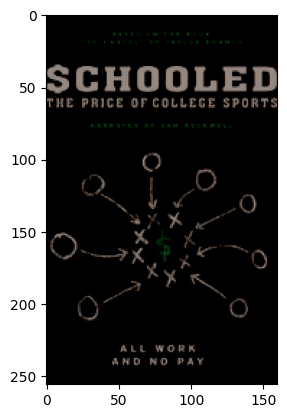

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Drama', 'Crime', 'Western']


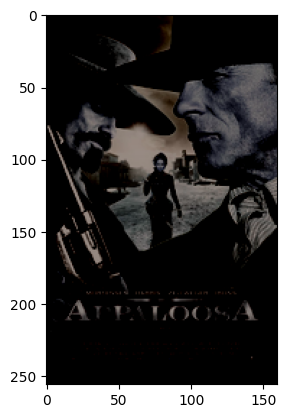

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Géneros de la película: ['Adventure', 'History']


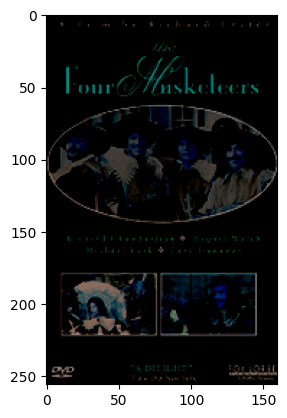

Géneros de la película: ['Drama', 'Thriller', 'Crime', 'Mystery', 'Music']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..138].


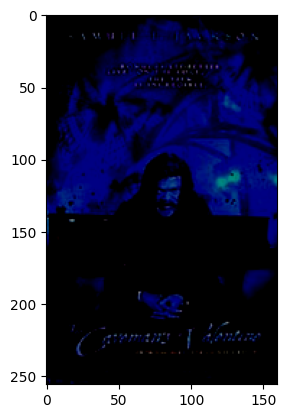

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..147].


Géneros de la película: ['Drama', 'Thriller', 'Action', 'Mystery', 'War']


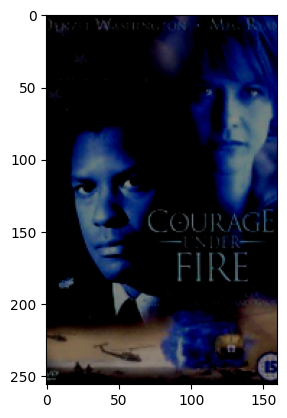

In [107]:
for i in range(5):
    display_image_and_genres(a[0][i], a[1][i])

In [135]:
def jaccard_coefficient(genre_bool1, genre_bool2):
    # Convierte los arrays de booleanos en listas de géneros
    genre_list1 = [g for g, b in zip(genres_list, genre_bool1) if b]
    genre_list2 = [g for g, b in zip(genres_list, genre_bool2) if b]

    # Convierte las listas de géneros en conjuntos
    genre_set1 = set(genre_list1)
    genre_set2 = set(genre_list2)

    # Calcula la intersección y la unión de los dos conjuntos de géneros
    intersection = genre_set1 & genre_set2
    union = genre_set1 | genre_set2

    # Calcula y devuelve el coeficiente de Jaccard
    return len(intersection) / len(union)

In [136]:
def find_similar_and_dissimilar(batch_images, batch_genres):
    # Selecciona una imagen y un género al azar del lote
    i = np.random.choice(len(batch_images))
    base_image = batch_images[i]
    base_genre = batch_genres[i]

    # Calcula los coeficientes de Jaccard con el resto de las imágenes y géneros en el lote, excluyendo la imagen base
    jaccard_coefficients = []
    
    for j, g in enumerate(batch_genres):
        if j != i:
            print("Base genre: ", base_genre)
            print("Genre to compare: ", g)
            print(jaccard_coefficient(base_genre, g))
            jaccard_coefficients.append(jaccard_coefficient(base_genre, g))
            
    remaining_images = [img for j, img in enumerate(batch_images) if j != i]


    # Ordena las imágenes por su coeficiente de Jaccard
    sorted_indices = sorted(range(len(jaccard_coefficients)), key=lambda i: jaccard_coefficients[i], reverse=True)

    # Devuelve la imagen base, su género y la lista de imágenes y géneros ordenados por coeficiente de Jaccard
    return base_image, base_genre, [(remaining_images[i], batch_genres[i], jaccard_coefficients[i]) for i in sorted_indices]

In [137]:
batch_images, batch_genres = generate_batch(train_images, train_genres, 50)

In [138]:
valor = find_similar_and_dissimilar(batch_images, batch_genres)

Base genre:  [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
Genre to compare:  [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0]
0.0
Base genre:  [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
Genre to compare:  [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
0.0
Base genre:  [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
Genre to compare:  [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0]
0.0
Base genre:  [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
Genre to compare:  [1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
0.0
Base genre:  [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
Genre to compare:  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
0.0
Base genre:  [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
Genre to compare:  [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
0.25
Base genre:  [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
Genre to compare:  [0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
0.5
Base genre:  [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
Genre to compa

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Coeficiente de Jaccard de la imagen base: 1.0
Géneros de la película: ['Comedy', 'Romance', 'Musical']


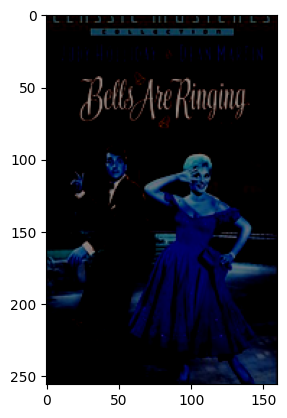

In [139]:
# Obtiene la imagen base y su género
base_image, base_genre = valor[0], valor[1]

# Imprime el coeficiente de Jaccard de la imagen base
print('Coeficiente de Jaccard de la imagen base:', jaccard_coefficient(base_genre, base_genre))

# Muestra la imagen base y su género
display_image_and_genres(base_image, base_genre)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Coeficiente de Jaccard: 0.5
Géneros de la película: ['Comedy', 'Romance', 'War']


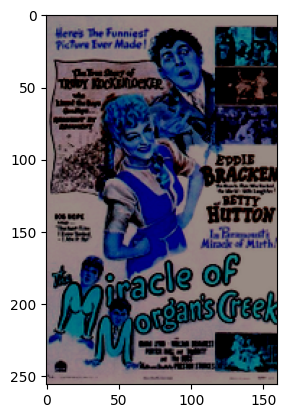

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Coeficiente de Jaccard: 0.4
Géneros de la película: ['Drama', 'Romance', 'Biography']


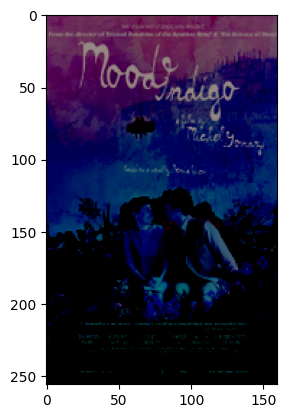

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Coeficiente de Jaccard: 0.4
Géneros de la película: ['Drama', 'War']


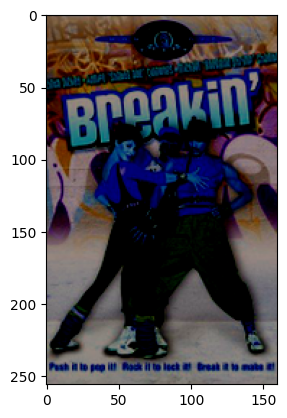

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Coeficiente de Jaccard: 0.25
Géneros de la película: ['Comedy', 'Fantasy']


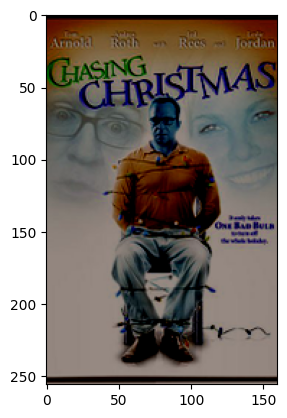

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Coeficiente de Jaccard: 0.25
Géneros de la película: ['Comedy', 'Western']


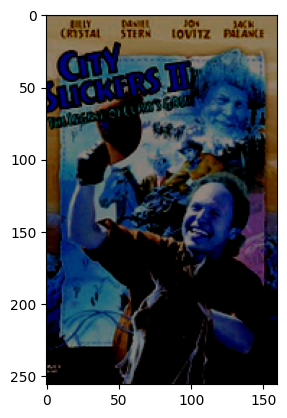

In [140]:
# Obtiene la lista de imágenes y géneros ordenados por coeficiente de Jaccard
sorted_images_genres = valor[2]

# Recorre los primeros 5 elementos de la lista
for i in range(5):
    # Obtiene la imagen, el género y el coeficiente de Jaccard
    image, genre, jaccard = sorted_images_genres[i]

    # Imprime el coeficiente de Jaccard
    print('Coeficiente de Jaccard:', jaccard)

    # Muestra la imagen y los géneros
    display_image_and_genres(image, genre)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Coeficiente de Jaccard: 0.0
Géneros de la película: ['Documentary', 'War']


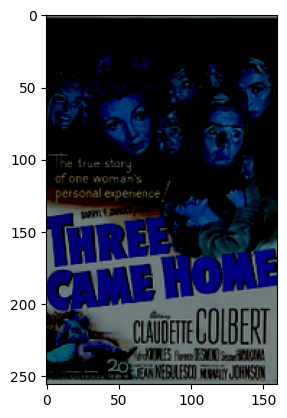

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Coeficiente de Jaccard: 0.0
Géneros de la película: ['Drama', 'War']


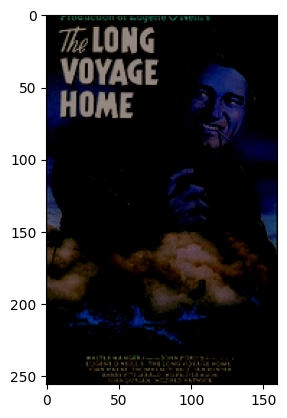

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Coeficiente de Jaccard: 0.0
Géneros de la película: ['Drama', 'Comedy', 'Romance', 'Music']


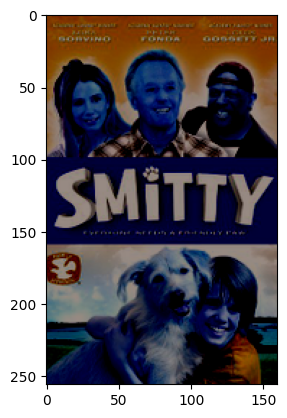

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Coeficiente de Jaccard: 0.0
Géneros de la película: ['Drama', 'Family']


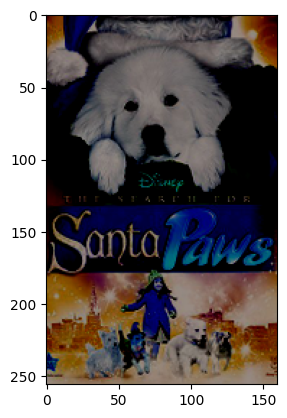

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123..151].


Coeficiente de Jaccard: 0.0
Géneros de la película: ['Comedy', 'Horror', 'Sci-Fi', 'Short']


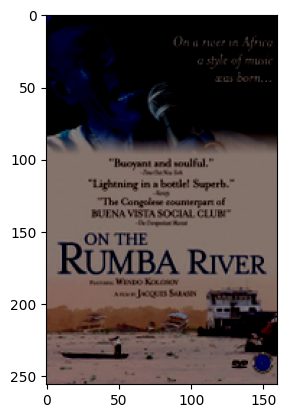

In [141]:
# Obtiene la lista de imágenes y géneros ordenados por coeficiente de Jaccard
sorted_images_genres = valor[2]

# Recorre los últimos 5 elementos de la lista
for i in range(-5, 0, 1):
    # Obtiene la imagen, el género y el coeficiente de Jaccard
    image, genre, jaccard = sorted_images_genres[i]

    # Imprime el coeficiente de Jaccard
    print('Coeficiente de Jaccard:', jaccard)

    # Muestra la imagen y los géneros
    display_image_and_genres(image, genre)